In [1]:
from mylibrary import * 
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 20000
a_low = 0.5
a_high = 3.0
a_divs = 20

In [3]:
def var_MC(a_values, num_steps=10000):
    results = []
    for a in a_values:
        # Trial wave function as p(x) from Q6
        trial_wavefunction = lambda x: 0.5 * (a**2 - x**2) if abs(x) < a else 0

        # Monte Carlo integration
        samples = np.random.uniform(-a, a, num_steps)
        integrand = np.array([trial_wavefunction(x)**2 * x**2 for x in samples])  # integrating harmonic potential energy
        energy = integrand.mean()
        results.append((a, energy))
    
    return results

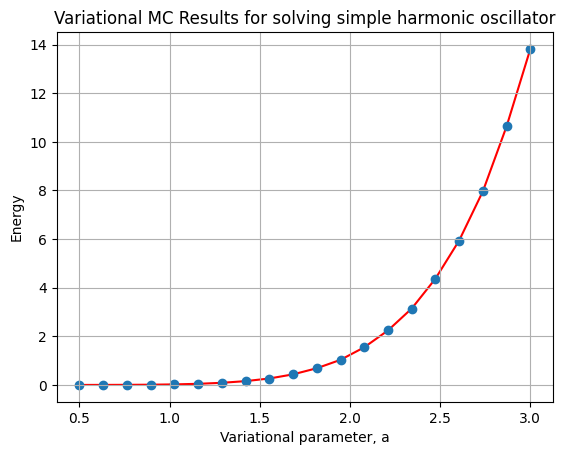

In [4]:
# Varying a from a_low to a_high (20 steps)
a_values = np.linspace(a_low, a_high, a_divs)
var_MC_results = var_MC(a_values, N)

# Plotting energy versus a
a_vals, energies = zip(*var_MC_results)
plt.scatter(a_vals, energies, zorder=1)
plt.plot(a_vals, energies, 'r', zorder=-1)
plt.xlabel('Variational parameter, a')
plt.ylabel('Energy')
plt.title('Variational MC Results for solving simple harmonic oscillator')
plt.grid()
plt.show()